In [9]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import operator
import os
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [10]:
text_list = read_text_folder("./datasample/")
print("document number:", len(text_list))

document number: 110


In [11]:
texts = os.listdir('./datasample')
#texts

In [12]:
corpus = []
for text in texts:
    with open('./datasample/{}'.format(text),'r',encoding = 'utf-8') as file:
        corpus.append(file.read())

In [13]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['太平山頂','纜車','凌霄閣','杜莎夫人蠟像館','阿甘蝦餐廳','維多利亞港','幻彩詠香江','張寶仔號','星光大道','迪士尼樂園','燈光秀','海洋公園','廟街夜市','男人街','周星馳','食神','旺角女人街','波鞋街','金魚街','西洋菜南街','昂坪360','纜車','昂坪市集','天壇大佛','水晶車','大澳','大嶼山','蘭桂坊','中環半山扶手電梯','重慶森林','王菲','石板街','砵典乍街','色戒','十月圍城','無間道','龍鳳鬥','泰昌餅家','蘭芳園','絲襪奶茶','中環','嘉咸街壁畫','壁畫','甄子丹','劉德華','追龍','功夫','九龍城寨','塗鴉藝術','天際100','灣仔','金紫荊廣場','時代廣場','鵝頸橋','跑馬','地馬場','尖沙咀','1881 Heritage','1881Heritage','半島酒店','海港城','女人街','朗豪街','旺角','東湧','東薈城','怪獸大廈','春秧街市場','春秧街','鴨寮街','美荷樓','黃大仙祠','彩虹邨','大澳漁村','南丫島','赤柱市集','美利樓','鴨靈號','澳門','九龍','奶油豬仔包','花園街','流沙包','炭烤燒肉','太平山夜景','觀景台','阿甘蝦','豬扒包','生煎包','恆香老婆餅','大館','檀島咖啡','甘牌燒鵝','宜必思酒店','蓮香居','港幣','來回機票','電子港簽','台胞證','中環','銅鑼灣','新界','叮叮車','上環','金鐘','灣仔','天后','的士','八達通卡','油麻地','九龍尖沙咀','紅勘','李嘉欣','The One百貨','TheOne百貨','THEONE百貨','theone百貨','K11商場','龍城大藥房','翠華餐廳','至潮魚蛋','太子','雞仔餅','紅豆燒餅','奇趣餅家','冰火菠蘿油','金華冰廳','燒汁釀茄子','菠蘿油','鴨肉火肉飯','太平山','阿甘正傳','郭富城','阿甘蝦美式餐廳','沾仔記雲吞麵','海山樓','192層蛋塔','近郊','巧克力博物館','黃竹坑站','食神','禮頓道站','跑馬地總站','西港城','生記粥品','新記車仔麵','鵝頸橋打小人','沙田賽馬場','黃大仙','黃大仙廟','深水埗站','深水埗','天星小輪','天星碼頭','欣澳站','迪士尼','赤柱','西貢','地質公園','全記海鮮','松記車仔麵','長洲','張保仔號','張保仔洞','興樂菜館','新照記魚丸','超人氣','香港旅遊發展局','旅遊發展局','網路','熱搜','精選','分享文','選出','自由行','彙整','省錢','快速通關','住宿地','路線','風情','相當','龐大','一律','開始','插座','天王','寫','哈','車廂','包廂','TOP','Top','大量','排隊','詳細','香港','paula','CDATA','googleadclientcapub8969488696235010','33642280','googleadslot8177660368','googleadwidth336','googleadheight280CDATA','netsunlight0324CM199229823','googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250'])

In [14]:
stopwords = ['在','她','厲害','Commonroom','Day','day','DAY','全日','失敗','但','少','多','印象','近距離','除了','美食','台灣','市區','？', '唷','可以','很','！','，','。','的', '是', '在', '有', '就', '獲', '不' , '會', '若', '而', '這', '該', 'ETtoday', '被' , '那個' , '...' ,'klook','Klook','kkday','Kkday','大','便宜','票券','票價','門票','推薦','地圖','啊','吧','大概','好像','忘記','香港','文章','波比','那些','攻略','答案','這些','或許','要馬','了','啦','還有','哪裡','哪些','大概','或者','根據','都','整理','PDF','超人氣','哪','旅遊景點','景點','旅遊','發展','諸多','程度','排名','熱搜','一定','以及','亦','以','與','精選','分享文','選出','必去','必買','買','搶先','最','更','自由行','附上','所有','去','到','抵達','玩','出來','行程','比價','安排','大家','優惠','事項','搶','方便','這份','拿','一次','一起','趕緊','彙整','百萬','我們','省錢','快速通關','處','世界','住宿地','住宿','地','地方','於','活動','著','含','更新','懶人包','私房','也','超詳細','規劃','又','這也','用品','路線','碧海','非常','風情','相當','龐大','一律','開始','插座','天王','寫','哈','機票','大補帖','總','顯示','目前','幾次', '車', '電子港簽','正式', '怎樣','車廂','搞定', '窺','包廂','無','和','游','TOP','Top','大量','排隊','往','狠','一日','大多','短短','回顧','完善','之旅','幾家','路程','這樣','硬性','詳細','超','香港','paula','CDATA','googleadclientcapub8969488696235010','33642280','googleadslot8177660368','googleadwidth336','googleadheight280CDATA','netsunlight0324CM199229823','googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250'] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

In [31]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
sorted(list(doc_word_frequency[7].items()) , key = lambda x: x[1] , reverse=True)[0:20] # 顯示第一篇文章的部份詞彙與對應詞頻
#for i in range (len(text_list)):
   # l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
#print(l_d)

[('的', 23),
 ('，', 15),
 ('是', 13),
 ('巴士', 13),
 ('在', 12),
 ('就', 11),
 ('中環', 10),
 ('！', 10),
 ('香港', 9),
 ('我們', 9),
 ('...', 9),
 ('去', 8),
 ('碼頭', 7),
 ('有', 7),
 ('了', 7),
 ('所以', 7),
 ('上', 6),
 ('搭', 6),
 ('BIGBUS', 5),
 ('走', 5)]

In [16]:
for i in range (len(text_list)):
    l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
print(l_d)


[('你', 75), ('我', 66), ('深水埗', 62), ('呢', 52), ('旅館', 45), ('這裡', 45), ('Wontonmeen', 44), ('人', 42), ('這個', 40), ('一個', 31), ('就是', 27), ('話', 25), ('住', 25), ('說', 24), ('很多', 24), ('唐樓', 24), ('來', 23), ('為', 23), ('做', 21), ('知道', 20), ('自己', 20), ('阿金', 18), ('老', 18), ('沒', 18), ('特色', 17), ('麵', 17), ('他', 17), ('對', 17), ('因為', 17), ('這麼', 17), ('什麼', 17), ('之', 17), ('闆', 16), ('想', 16), ('一家', 16), ('一些', 16), ('籠屋', 15), ('設計', 15), ('上', 15), ('娘', 15), ('要', 14), ('後', 14), ('跟', 14), ('看', 14), ('真的', 14), ('這家', 13), ('Pat', 13), ('把', 13), ('吃', 13), ('^', 12), ('模型', 12), ('電影', 11), ('所以', 11), ('空間', 11), ('招牌', 11), ('細蓉', 10), ('甚至', 10), ('咖啡', 10), ('不是', 10), ('.', 10), ('看到', 10), ('照片', 10), ('這是', 10), ('他們', 10), ('讓', 10), ('狂', 10), ('旅', 10), ('好', 9), ('東西', 9), ('錢', 9), ('不會', 9), ('感覺', 9), ('社區', 9), ('雲', 8), ('吞', 8), ('經典', 8), ('音樂', 8), ('相信', 8), ('感受', 8), ('假如', 8), ('加上', 8), ('超級', 8), ('哈哈', 8), ('再', 8), ('愛', 8), ('這種', 8), ('房間', 8), ('

In [17]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [18]:
# 查詢斷完詞後的 list 
corpus_cut = [jieba.lcut(t) for t in corpus]
corpus_cut

[['當然',
  '，',
  '大部分',
  '來',
  '香港',
  '的',
  '朋友',
  '。',
  '女性',
  '多半',
  '來',
  '血拼',
  '的',
  '畢',
  '竟是',
  '免稅',
  '天堂',
  '，',
  '精品',
  '品牌',
  '的',
  '價位',
  '真的',
  '差滿',
  '多',
  '的',
  '男性',
  '，',
  '不是',
  '陪伴',
  '女友',
  '，',
  '就是',
  '來',
  '享受',
  '美食',
  '啦',
  '。',
  '這萬象',
  '之',
  '都',
  '的',
  '三天',
  '或是',
  '二天',
  '度假',
  '，',
  '都',
  '得',
  '好好',
  '運',
  '用到',
  '香港',
  '便利',
  '交通工具',
  '啊',
  '！',
  'CDATA',
  'googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250',
  'CDATA',
  '所以',
  '接下',
  '來介紹',
  '，',
  '最好',
  '的',
  '交通工具',
  '。',
  'CDATA',
  'googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250',
  'CDATA',
  '沒有',
  '錯',
  '，',
  '傳說',
  '中',
  '的',
  '十一',
  '路公車',
  '眾人圍',
  '毆',
  '。',
  '。',
  '。',

#文章數量要夠多才能用
#sorted_d = sorted(doc_word_frequency.items(), key=operator.itemgetter(1), reverse = True)

檢查字典
利用coshow

In [19]:
##a = [[1, 2], [3, 4]] 大概是這概念
#cut = [i for sublist in corpus_cut for i in sublist]
#new_dic = []
#for i in range(len(cut) - 1):
#    assemble_word = cut[i]+cut[i+1]
#    new_dic.append(assemble_word)
#    #print(cut[i]+cut[i+1])
#    print(assemble_word)
#    #print(new_dic)

In [20]:
#def add_word(list):
#    for items in list:
#        jieba.add_word(items)
#add_word(new_dic)

In [21]:
#doc_names = range(len(text_list))
#dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [22]:
#doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻
#sorted(list(doc_word_frequency[0].items()) , key = lambda x: x[1] , reverse=True)

In [23]:
# 斷詞後的 list 變成用空格把每個詞分開的形式
corpus = [' '.join(lcut) for lcut in corpus_cut]
# 可以接到 apriori 的過程

In [24]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,事,主臥,區來,混在,絢麗,爹,MiniStudio,照射,國度,關話,...,好泳裝,親手,星期,人發,不放上,回味,天網,枱,勞藥局,US15.9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,事,主臥,區來,混在,絢麗,爹,MiniStudio,照射,國度,關話,...,好泳裝,親手,星期,人發,不放上,回味,天網,枱,勞藥局,US15.9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.006171,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.019662,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.034501,0.0,0.0,0.000000,0.028199,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0.023519,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [26]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('事', 0.0),
 ('主臥', 0.0),
 ('區來', 0.0),
 ('混在', 0.0),
 ('絢麗', 0.0),
 ('爹', 0.0),
 ('MiniStudio', 0.0),
 ('照射', 0.0),
 ('國度', 0.0),
 ('關話', 0.0)]

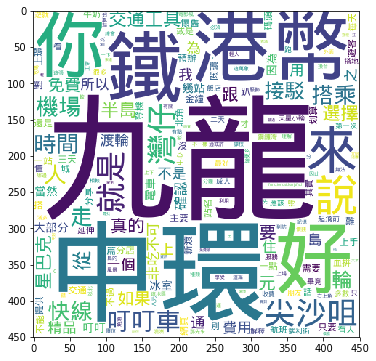

In [27]:
linux_font = r'/Users/leeyishan/Documents/GitHub/in_home/FinalProject/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=450, width=450)


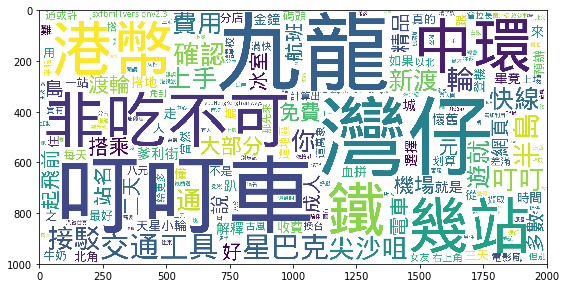

In [28]:
#修正過後
plt.figure(figsize=(20, 15))
ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=1000, width=2000)

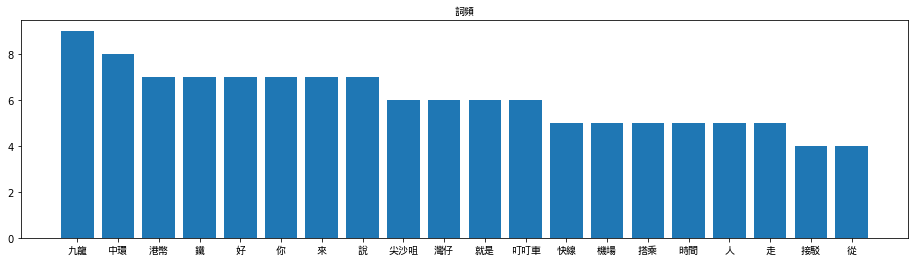

In [29]:
plt.figure(figsize=(35, 4))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

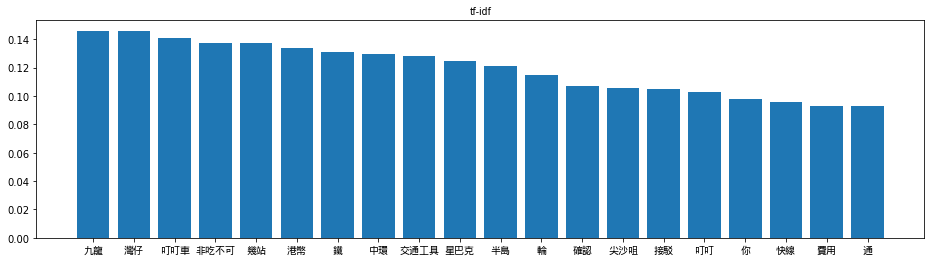

In [30]:
#修正過後
plt.figure(figsize=(35, 4))
ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")